# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## Dataset

In [41]:
# DO NOT MODIFY
from sklearn.datasets import make_moons
X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [42]:
# Splitting Data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# For model classification, it's best to use either logisticRegression, support vector machines (SVCs), or decision trees. I used LogisticRegression
model = LogisticRegression()

# Model Training
model.fit(X_train, y_train)

LogisticRegression()

## Testing / Optimization

In [43]:
# Optimization --> Many options like Feature Selection/Engineering, Model selection, Hyperparameter Tuning (the one I'm using)
# I was not too sure about this so I used this source as reference: https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

/Users/chinmaynot/Desktop/MDST/tut/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chinmaynot/Desktop/MDST/tut/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chinmaynot/Desktop/MDST/tut/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/chinmaynot/Desktop/MDST/tut/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py"

## Performance Analysis

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.98      0.98      0.98        96

    accuracy                           0.96       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.96      0.96      0.96       100



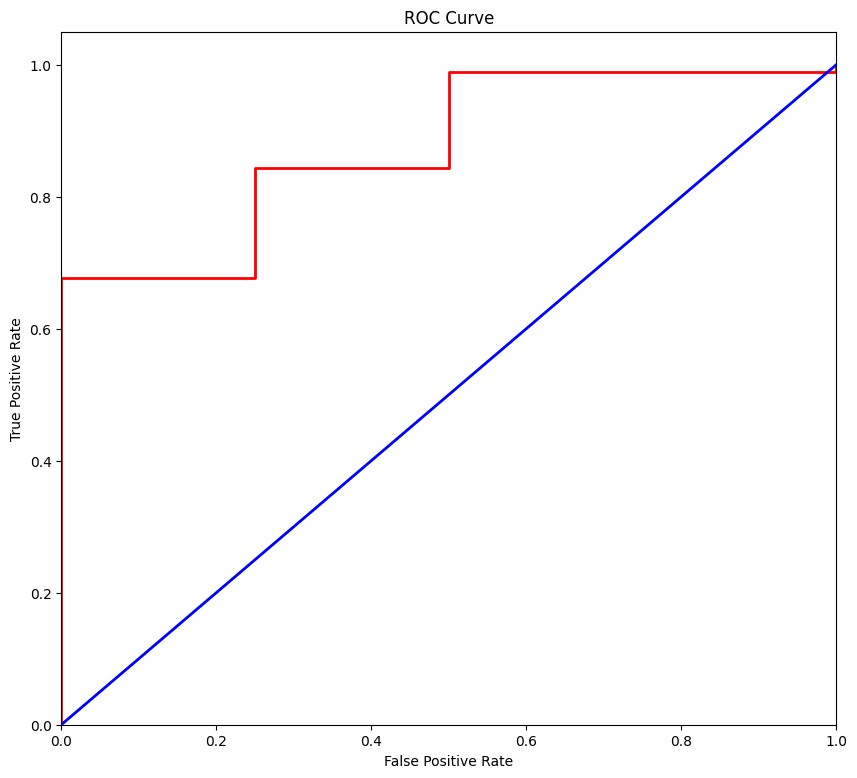

Accuracy: 0.960


In [44]:
# Model Evaluation
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curves --> A good indicator of the performance of a classification model. The further away the the curve from the central line that passes through the origin, the better
# The central blue line shown below depicts the line of a random classifier 
fpr, tpr, thresholds = roc_curve(y_test, best_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Step 8: Conclusion and Analysis
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

In [45]:
print("As we can see, the model is 96% accurate. Other approaches to solve this problem could have been used and yielded different results.")

As we can see, the model is 96% accurate. Other approaches to solve this problem could have been used and yielded different results.
